In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Access the flower images data stored in folders



In [3]:
import os
import cv2
from tqdm import tqdm
import numpy as np
path="/content/drive/MyDrive/Colab Notebooks/daisy"
images=[]
for root, dirs, files in os.walk(path):
    for file in tqdm([f for f in files if f.endswith('.jpg')]):
        src= root+'/'+file
        img= cv2.imread(src,0)
        img= cv2.resize(img,(128,128))
        img= img.flatten()
        images.append(img)

images=np.array(images)

100%|██████████| 762/762 [00:18<00:00, 42.29it/s] 


In [4]:
#shape of images
images.shape

(762, 16384)

### Visualization of Images

In [5]:
# To view images how they look

import matplotlib.pyplot as plt
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image,cmap="gray")
    plt.show()

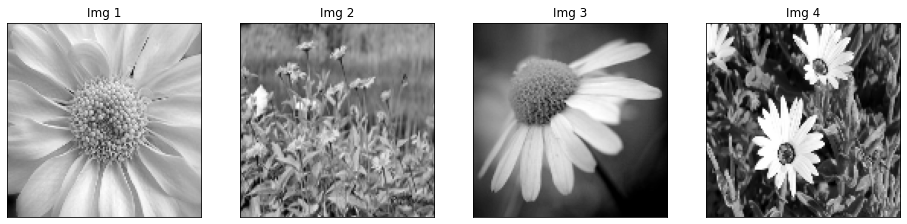

In [6]:
visualize(
    img_1=images[0].reshape(128, 128),
    img_2=images[1].reshape(128, 128),
    img_3=images[2].reshape(128, 128),
    img_4=images[3].reshape(128, 128)
)

### Principle component Analysis
Reduces redundant directions in 99% confidence interval

In [7]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
transformed_data = pca.fit_transform(images)
transformed_data.shape

(762, 588)

#### eigen values

In [8]:
eigenv = pca.components_
eigenv.shape

(588, 16384)

####   Recognised features

In [9]:
feature_maps= eigenv.reshape((588,128,128))

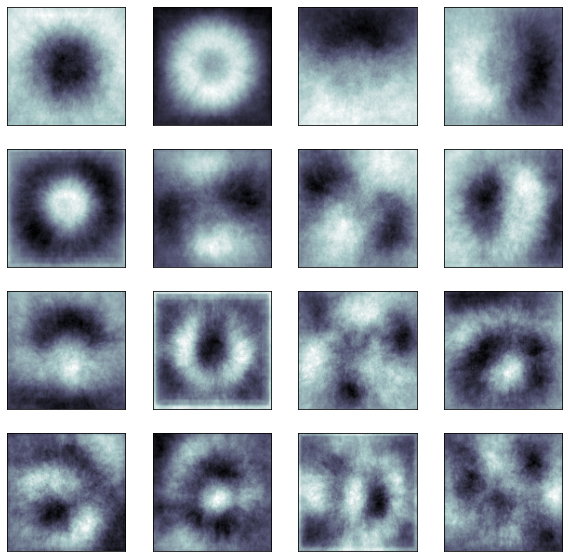

In [24]:
fig= plt.figure(figsize=(10,10))
for i in range(16):
  ax= fig.add_subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  ax.imshow(feature_maps[i], cmap=plt.cm.bone)
plt.show()


## Gaussian Mixture Model

In [11]:
from sklearn.mixture import GaussianMixture as GMM

##### Finding best number of components using AIC measure

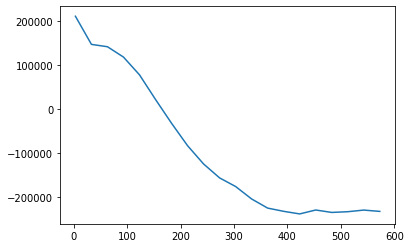

In [ ]:
models = [GMM(n, covariance_type='full', random_state=0)
          for n in np.arange(1, 600, 10)]
aics = [model.fit(transformed_data).aic(transformed_data) for model in models]
plt.plot(np.arange(1, 600, 10), aics)

##### Best n_components is around 410 that minimizes the AIC

#### Checking convergence of the data

In [15]:
gmm = GMM(410, covariance_type='full', random_state=0)
gmm.fit(transformed_data)
print(gmm.converged_)

True


#### Generating Samples from GMM model

In [16]:
Synthetic_Data = gmm.sample(15)
Synthetic_Data = Synthetic_Data[0]
print(Synthetic_Data.shape)

(15, 588)


##### Transforming it into actual image size

In [17]:
Synthetic_Data = pca.inverse_transform(Synthetic_Data)

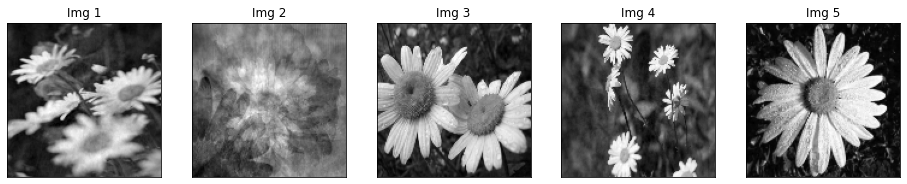

In [25]:
visualize(
    img_1=Synthetic_Data[0].reshape(128, 128),
    img_2=Synthetic_Data[1].reshape(128, 128),
    img_3=Synthetic_Data[2].reshape(128, 128),
    img_4=Synthetic_Data[3].reshape(128, 128),
    img_5=Synthetic_Data[5].reshape(128, 128),
)

In [26]:
for i in range(15):
    img=Synthetic_Data[i].reshape(128, 128)
    cv2.imwrite("/content/img_"+str(i)+".jpg",img)